<a href="https://colab.research.google.com/github/Uzumaki17/Play-Store-Data-Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Play Store App Review Analysis**



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member** - Jambay Yeshi


# **Project Summary -**

- The Android operating system is widely recognized as the most popular mobile operating system, boasting 2.5 billion active users. It currently dominates the mobile device market, with approximately 85% of all devices running on Google's Android OS. The Google Play Store serves as the largest and most popular platform for Android applications.

- Given the immense user base and potential of the Play Store, analyzing its app data can offer valuable insights for app developers and businesses. Our project aimed to gather and analyze comprehensive information about apps in the Google Play Store to provide insights into app features and the current state of the Android app market.

- The main objective of our project was to explore and analyze the data to identify key factors that contribute to app engagement and success. We aimed to uncover relationships between various attributes, such as the pricing model (free or paid), user reviews, and app ratings.

- The dataset we utilized contains 10,841 rows and 13 columns, with each row representing an individual app. The columns provide information about the app's category, user reviews, rating, size, and other relevant features. Through our analysis, we aimed to identify patterns and correlations that can guide developers in creating successful apps and capturing the Android market.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


- The objective is to analyze the factors that motivate people to download Android apps and understand how these factors are interconnected. We will focus on analyzing the categories, reviews, prices, ratings, and installations of apps. The insights we aim to uncover include:

- Identifying the category with the highest number of installations.
- Determining the top 5 apps with the maximum installations.
- Identifying the top 5 apps with low installation numbers.
- Evaluating the importance of ratings for an application.
- Identifying the top category on the Play Store.
- Analyzing the number of apps based on their pricing (free or paid).

By analyzing these aspects, we can gain valuable insights into user preferences and behaviors related to app installations on the Android platform.

#### **Define Your Business Objective?**

- Gain insights into the Android application market and its categories.
- Analyze the factors that influence the success of Android applications.
- Identify the key factors responsible for app engagement and user satisfaction.
- Study and analyze detailed information about Android applications.
- Determine the most important attributes for a successful application.
- Understand the requirements for an application to achieve top rankings in charts.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [14]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
file_path = ('/content/drive/MyDrive/Project_Data/Play Store Data.csv')
play_store_data = pd.read_csv(file_path)

### Dataset First View

In [13]:
# Dataset First Look
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
play_store_data.shape

(10841, 13)

### Dataset Information

In [8]:
# Dataset Info
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
dup_count = play_store_data.duplicated().sum()
dup_count

483

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
missing_values = play_store_data.isnull().sum()
print(missing_values)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


<Axes: >

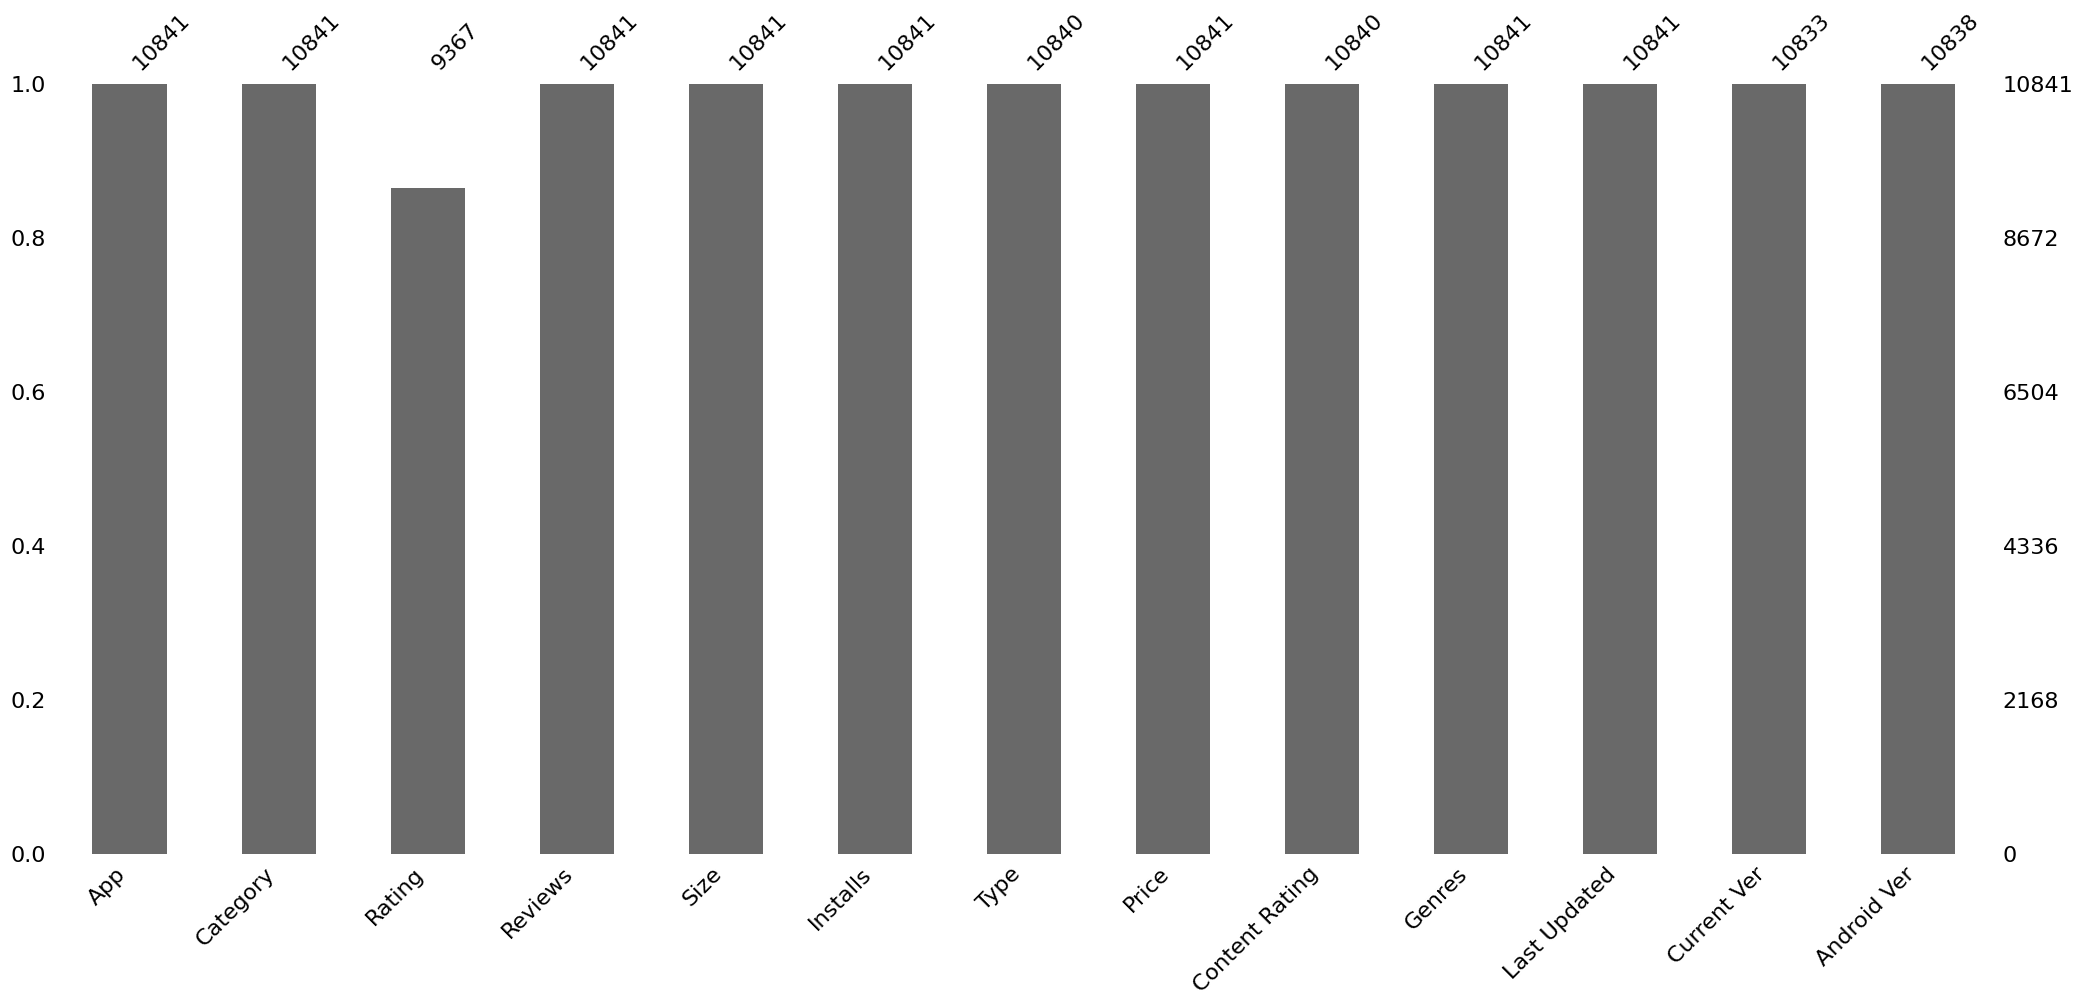

In [11]:
# Visualizing the missing values
msno.bar(play_store_data)

### What did you know about your dataset?

- The following columns contains null values in the dataset:


> - Rating
- Type
- Content Rating
- Current Ver
- Android Ver

- All the columns contain object data type except for 'Rating' which has float type.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [20]:
# Dataset Describe
print("Dataset numerical summary:")
print('_'*40)
print(play_store_data.describe())

Dataset numerical summary:
________________________________________
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


### Variables Description


1.App : indicates the name of the apps (this column has duplicate values in the
        rows)

2.Category : this indicates the various categories of the apps

3.Rating: this indicates the ratings recieved by the respective apps

4.Reviews: this indicates the number or reviews recieved by the app

5.Size :indicates the size of the app

6.Installs: indicates the number of installs of the respective app

7.Type: Shows the type of the app which is free or paid

8.Price: this field shows the price of the fields, 0 for free and amount if paid

9.Content Rating: shows the targated audiance of the app and what type of
                  audiance has reviewed the app

10.Genres: shows the Genre of the app, (same as category)

11.Last Updated: shows the latest date of the app that has updated

12.Current Ver: shows the latest version of the app

13.Androaid Ver: shows the version of android which can support the given app




### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
unique_var = []
for val in play_store_data.columns:
  x = play_store_data[val].value_counts().count()
  unique_var.append(x)

df1 = pd.DataFrame(unique_var, index = play_store_data.columns, columns =['Value count'])
df1

,Value count
App,9660
Category,34
Rating,40
Reviews,6002
Size,462
Installs,22
Type,3
Price,93
Content Rating,6
Genres,120


## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Write your code to make your dataset analysis ready.
def convert_to_int(x):
    '''
    Converts a string representation of a number to an integer
    '''
    # Remove special characters
    x = x.replace(',', '').replace('+', '').replace('$', '')

    if x.isdigit():
        # Return the integer value if the input is already a valid number
        return int(x)
    elif 'M' in x:
        # Convert millions to integer by multiplying with 10^6
        return int(float(x.replace('M', '')) * 10**6)
    elif 'k' in x:
        # Convert K to integer by multiplying with 10^3
        return int(float(x.replace('k', '')) * 10**3)
    elif x in ['Free', 'Varies with device', 'Everyone']:
        # Handle special cases where the value is not a number
        return 0
    else:
        # Evaluate the remaining expressions
        return int(eval(x))


In [25]:
play_store_data['Reviews'] = play_store_data['Reviews'].apply(convert_to_int)
play_store_data['Size'] = play_store_data['Size'].apply(convert_to_int)
play_store_data['Installs'] = play_store_data['Installs'].apply(convert_to_int)
play_store_data['Price'] = play_store_data['Price'].apply(convert_to_int)

### What all manipulations have you done and insights you found?

- After conducting extensive analyses on the dataset, the following data transformations have been performed.

In [26]:
outlier1 = play_store_data[play_store_data['Rating']>5]
outlier1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,1000,0,0,0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [63]:
play_store_data.loc[play_store_data['Rating']==19,'Rating'] = 1.9

In [64]:
play_store_data[play_store_data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


- We can see that earlier there was a rating which was way higher than the standard rating limit, but now we have resolve that issue.

In [31]:
play_store_data['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10841, dtype: object

In [32]:
# There are underscores in between some variables name so we will remove them
def remove_underscore(var):
  if '_' in var:
    var=var.replace('_',' ')
  return var

In [33]:
play_store_data['Category'] = play_store_data['Category'].apply(remove_underscore)

In [34]:
play_store_data['Category']

0             ART AND DESIGN
1             ART AND DESIGN
2             ART AND DESIGN
3             ART AND DESIGN
4             ART AND DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS AND REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10841, dtype: object

In [36]:
# Now we will handle the missing values
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [55]:
missing_value_percent = round((play_store_data['Rating'].isnull().sum())/len(play_store_data['Rating'])*100,2)
missing_value_percent

13.6

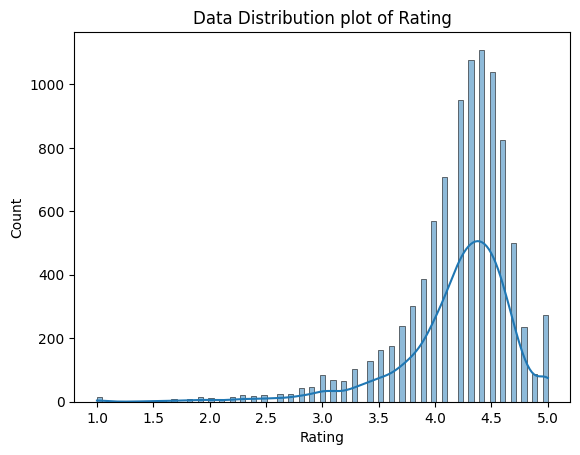

In [65]:
#By ploting distribution plot we can choose between mean amd median.
plt.title('Data Distribution plot of Rating')

sns.histplot(play_store_data['Rating'],kde = True)
plt.show()

- Since the distribution is skewed it advisable to use median to handle the missing values as median is less sensitive to outliers.

In [39]:
# fill the missing values with the median value
median_value = play_store_data['Rating'].median()
median_value = round(median_value, 2)
play_store_data['Rating'] = play_store_data['Rating'].fillna(median_value)
print(f'Missing values will be replaced by: {median_value}')

Missing values will be replaced by: 4.3


- And the other missing values, we will just drop them as they are very less

In [46]:
play_store_data.shape

(10841, 13)

In [41]:
#drop the missing values and store it in a new dataframe
new_df = play_store_data.dropna(subset= ['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

In [47]:
new_df.shape

(10829, 13)

In [49]:
dup_count = new_df['App'].duplicated().sum()
print(f'Total duplicate values: {dup_count}')

Total duplicate values: 1181


In [50]:
new_df = new_df.drop_duplicates(subset=['App'], keep='first')

In [51]:
dup_count = new_df['App'].duplicated().sum()
print(f'Total duplicate values: {dup_count}')

Total duplicate values: 0


#### Data Manipulation summary:
- There were 13.6% missing values in Rating column and we replaced it with the median value.

- The following data preprocessing steps were performed:

> - Outlier Removal: Outliers were removed from the "Rating" column.
- Underscore Removal: Underscores were removed from the required columns.
- Data Type Conversion: The data types of columns were converted from object to integer or float as required.
- Missing Value Handling: Missing values in the dataset were handled.


These preprocessing steps were applied to enhance the quality and consistency of the data for further analysis or modeling tasks.



In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   int64  
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   int64  
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.0+ MB


In [57]:
new_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9648.000000,9.648000e+03,9.648000e+03,9.648000e+03,9648.000000
mean,4.192465,2.168369e+05,1.781989e+07,7.786211e+06,1.030991
std,0.496552,1.832349e+06,2.150200e+07,5.378830e+07,16.808582
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,2.900000e+06,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,9.200000e+06,1.000000e+05,0.000000
75%,4.500000,2.944925e+04,2.500000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [58]:
new_df.shape

(9648, 13)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
- Distribution of Rating across various apps

Text(0, 0.5, 'Count')

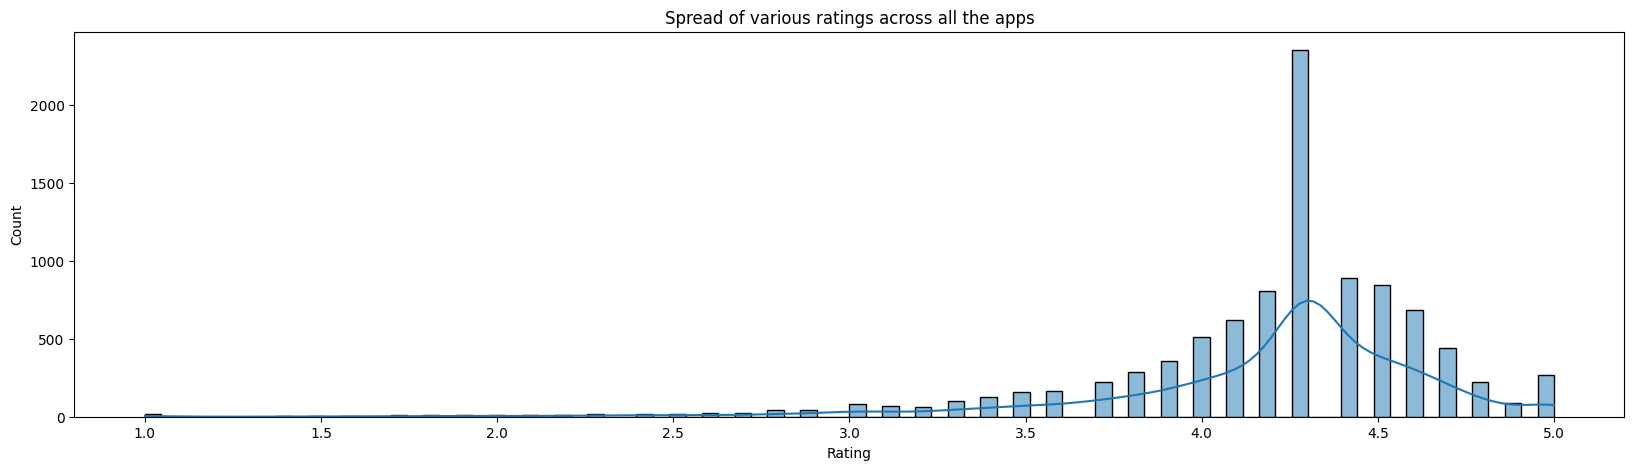

In [67]:
# Chart - 1 visualization code
plt.rcParams['figure.figsize'] = (20, 5)
sns.histplot(new_df, x='Rating', kde=True)

#Describing details for the plots
plt.title('Spread of various ratings across all the apps')
plt.xlabel('Rating')
plt.ylabel('Count')

##### 1. Why did you pick the specific chart?

Histplots are a great for analyzing the distribution of numerical values

##### 2. What is/are the insight(s) found from the chart?

It is clear from the chart that majority of the apps are rated 4.25

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since many apps have a rating of 4.2, it indicates that there is an opportunity to create a new app that can better meet the needs of the market

#### Chart - 2

Paid app counts with respect to price

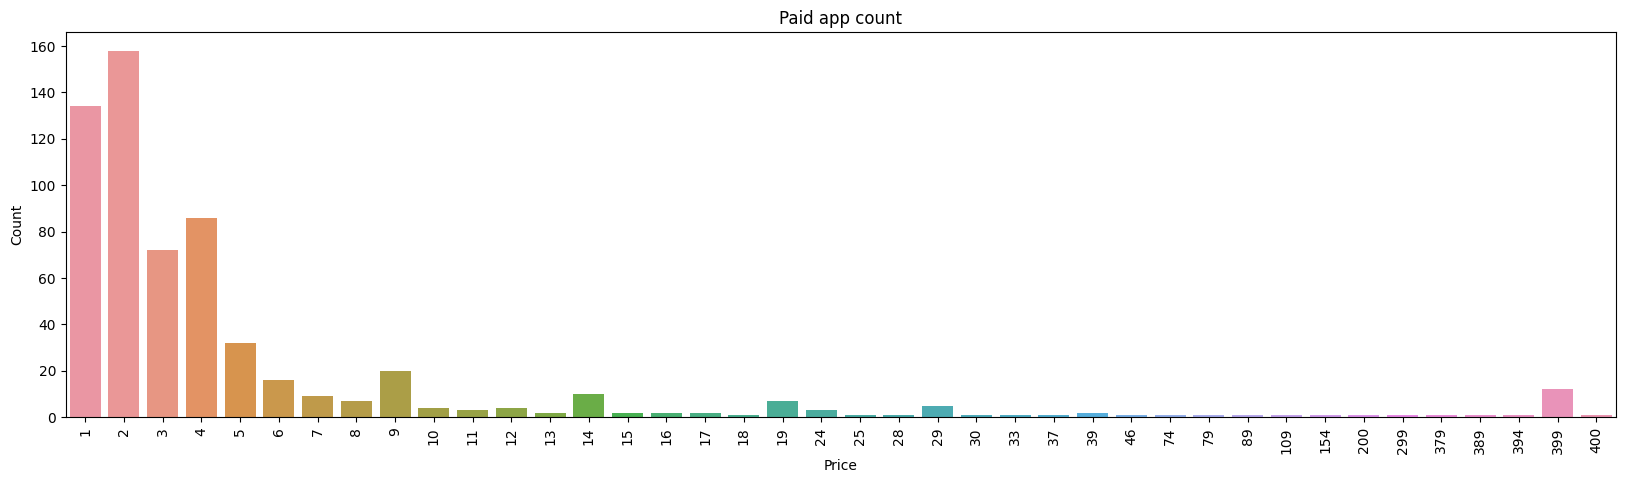

In [68]:
# Chart - 2 visualization code
free_app_value = 0
plt.rcParams['figure.figsize'] = (20, 5)
df_without_free_apps = new_df['Price'] != free_app_value
sns.countplot(data=new_df[df_without_free_apps], x='Price')

plt.xticks(rotation=90)
plt.title('Paid app count')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A seaborn count plot displays the number of occurrences of apps based on different values. In this case, we are interested in knowing the count of apps that have a non-zero price.

##### 2. What is/are the insight(s) found from the chart?

We can see clearly that most number of apps are priced at 2 followed by 1.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Majority of the apps are priced between 1 to 9

So it would be a good thing if we can make an app that falls in this price range

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***